# HW5: Creating Charts that Show Time
Course: DS2003

**Eleanor Fox**

**Topic:** Data Visualization           
**Purpose:** To practice graphing time.        
**Instructions:** Create a graph using the data provided and prompts below.       
Please comment your code to document your understanding. You can use as many code chunks as you need to show your work.         
**Submission:** Upload an html to Canvas.       

*15 points*

### Set-up your environment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Create a Graph
* On Canvas, with this assignment, you will find a file called `uva_stats_DS2003.csv`. This file contains game stats data from the UVA men's basketball team for the 2024-25 season. Variables include:    
  * `PLAYER`: player name   
  * `GAMEDATE`: date of the game    
  * `OPPONENT`: name of the opponent    
  * `POINTS`: points scored by the player during the game - points are scored by making field goals (2 or 3 pointers) or free throws (1 pointers)   
  * `REBOUNDS`: rebounds by the player during the game - rebounds are when a player retrieves the ball after a missed scoring attempt
  * `ASSISTS`: assists by the player during the game - assists are passes that directly lead to a score

* Note: The data source is ESPN. 

* Create a graph that shows time. You can decide which players, stats, and time frame to use.  
  * This is intentionally vague. I want you to read about the team, explore the data, and create a graph that tells a story.    
* Remember to use the concepts we have learned in class to make your graph **clear, visually appealing, and informative**.  

Rubric:
You will be graded on the following:
* 5 points: student loads the data and creates a graph
* 10 points: student generally applies concepts learned in class to make the graph clear, visually appealing, and informative.
* 15 points: student creates an exceptional graph that tells a compelling story.

C:\Users\elean\AppData\Local\Temp\ipykernel_30680\1579211279.py:61: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\elean\anaconda3\envs\3.12.7-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


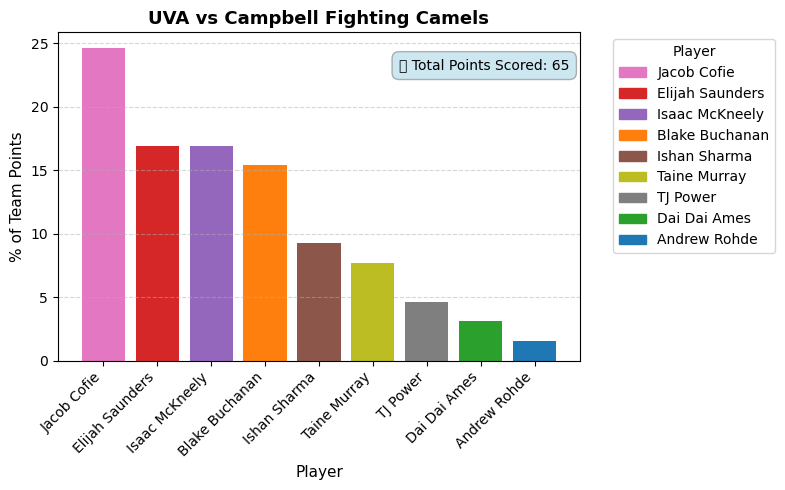

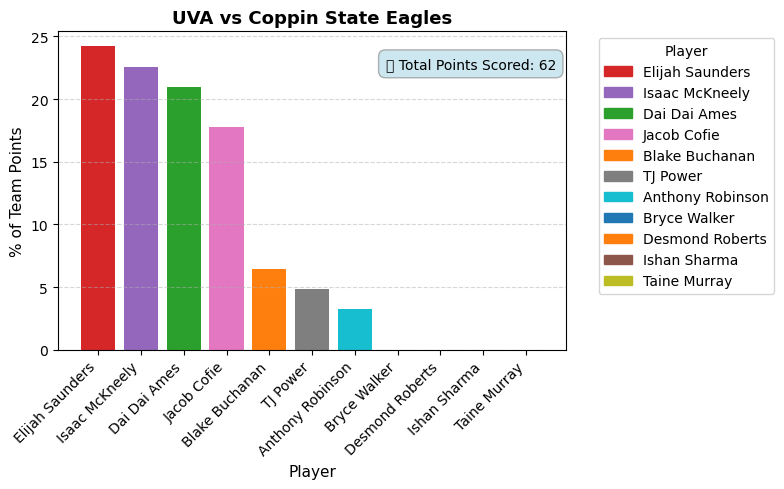

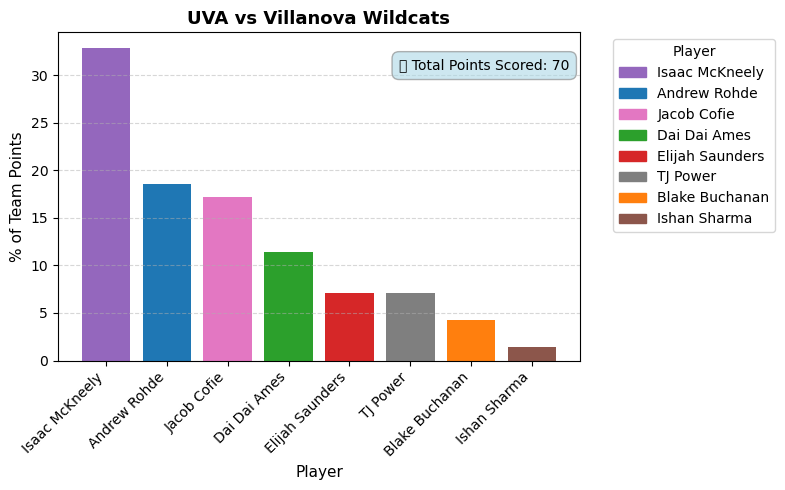

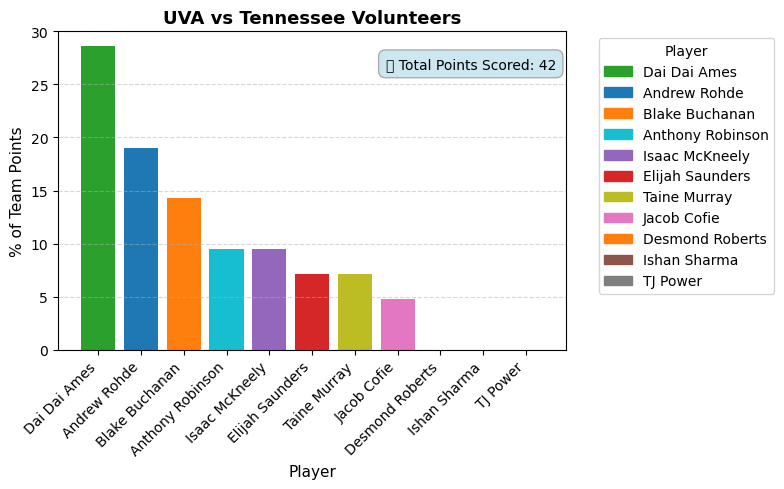

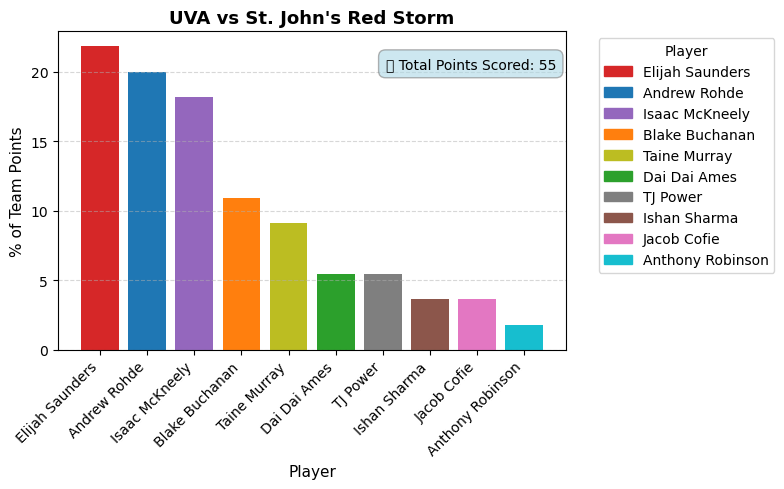

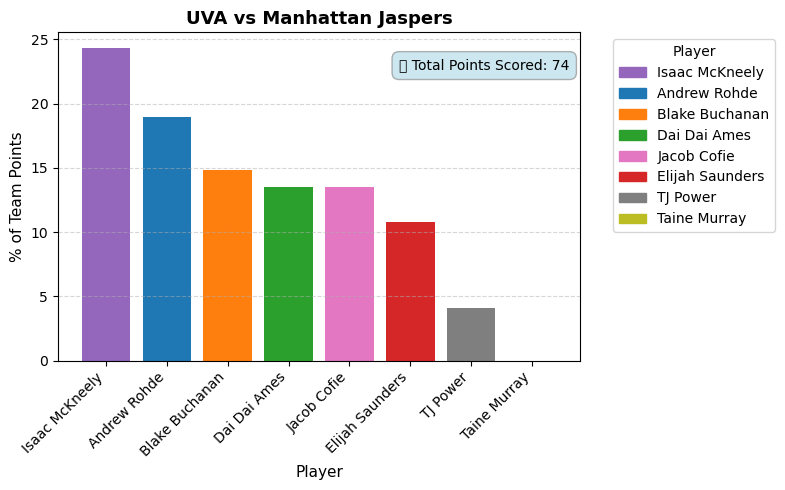

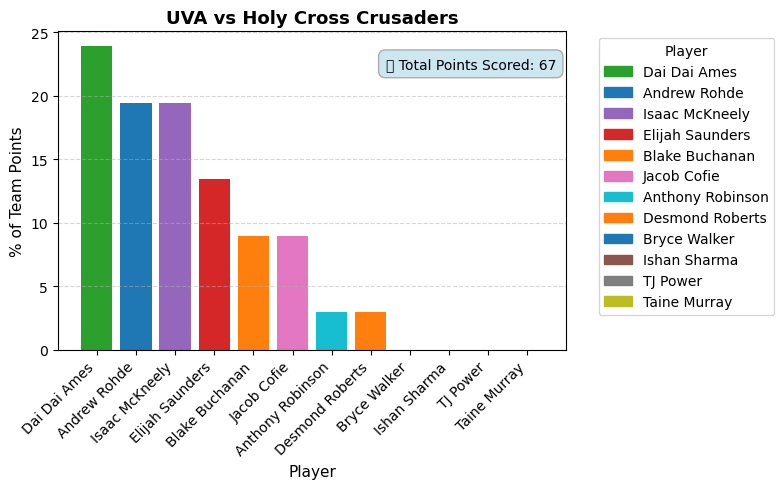

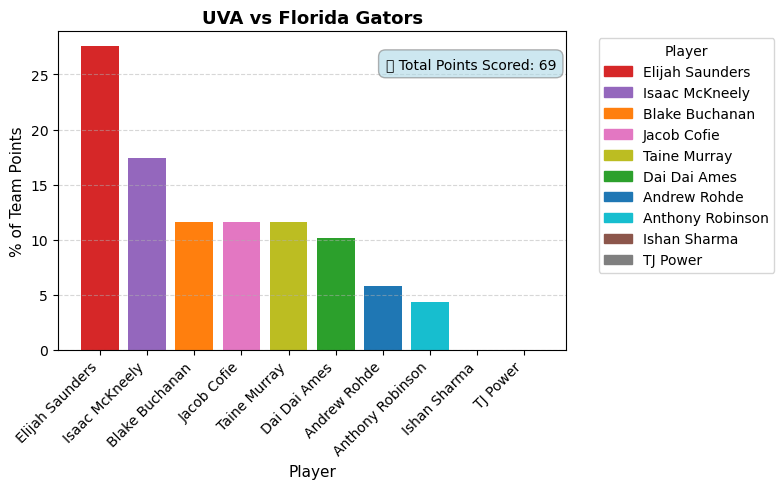

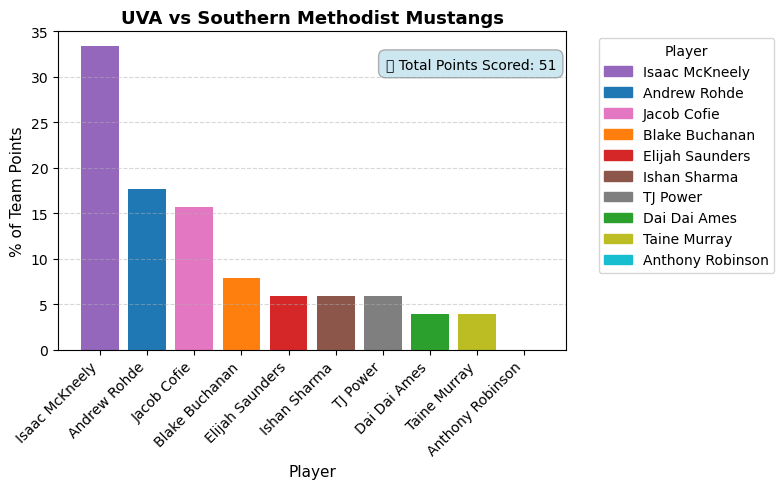

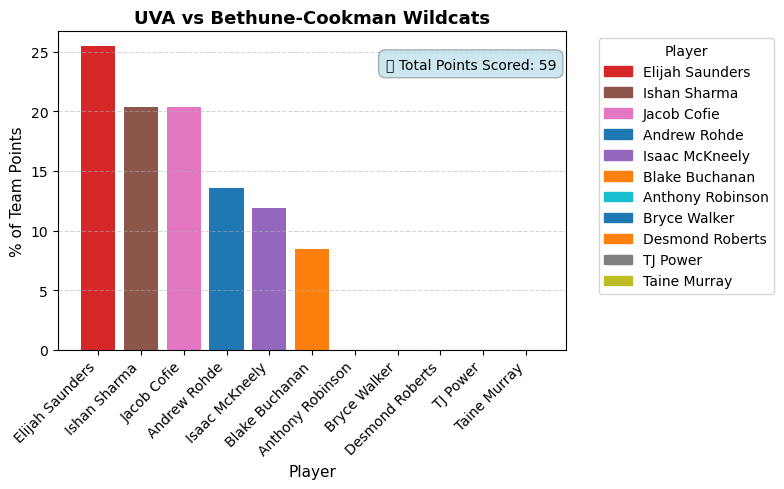

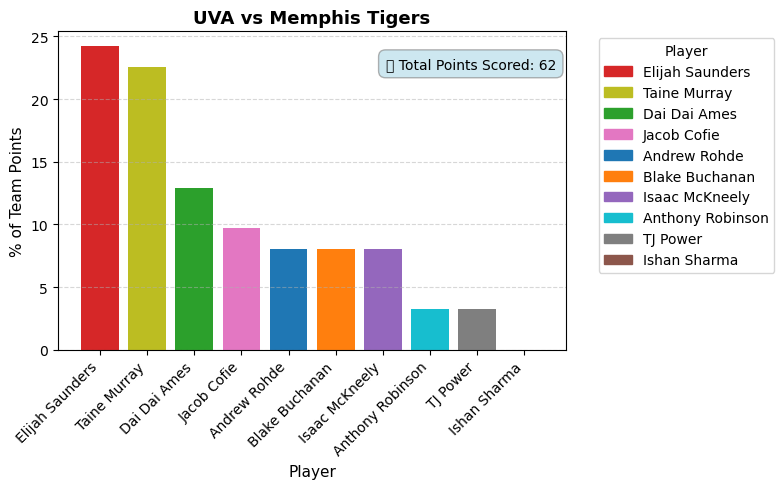

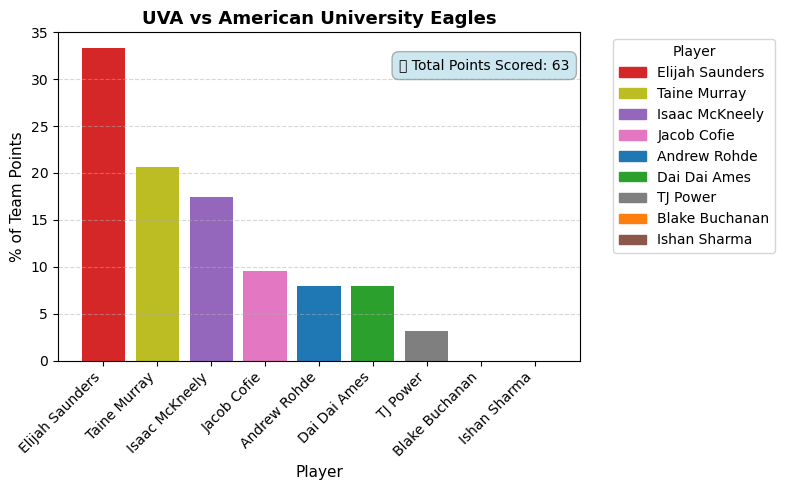

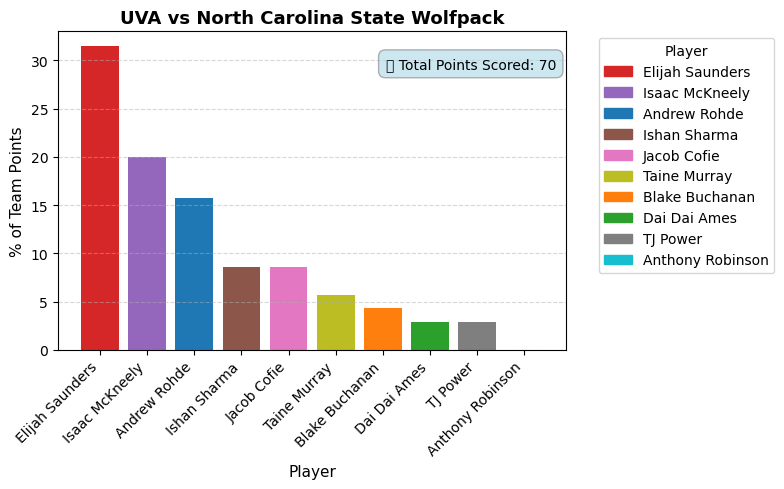

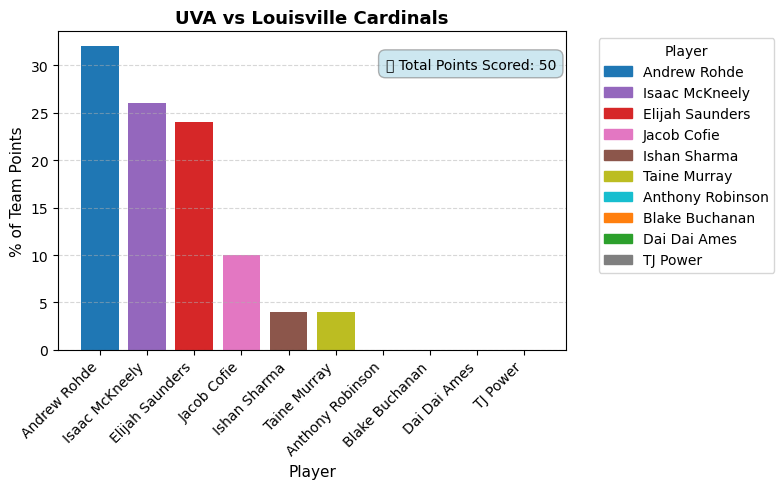

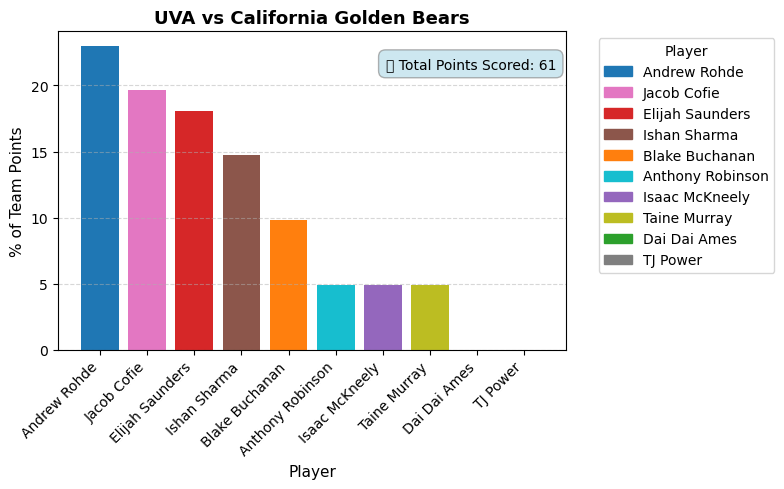

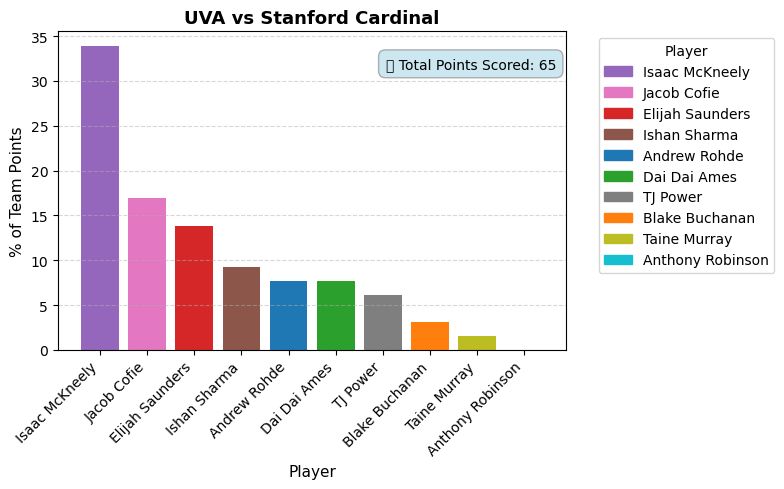

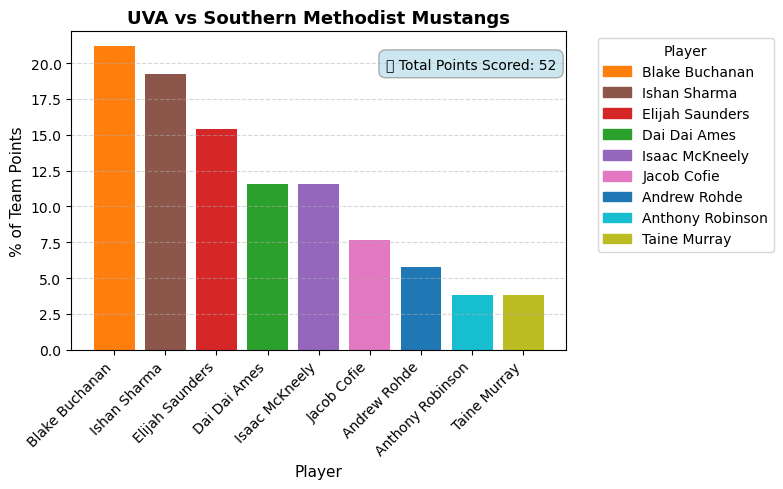

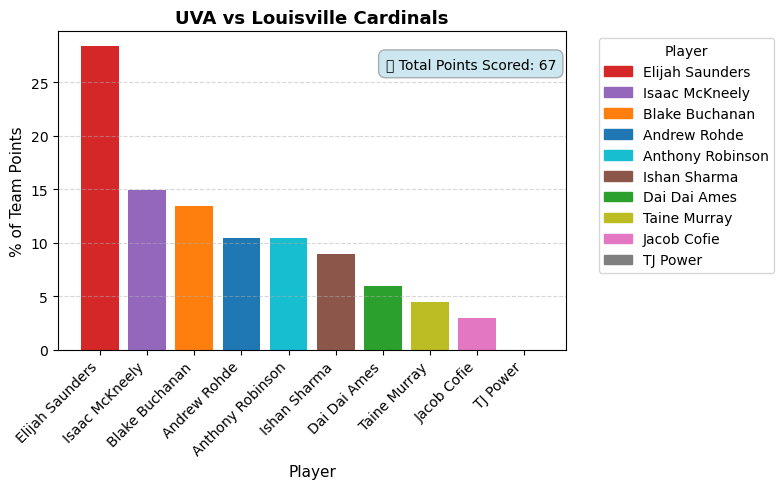

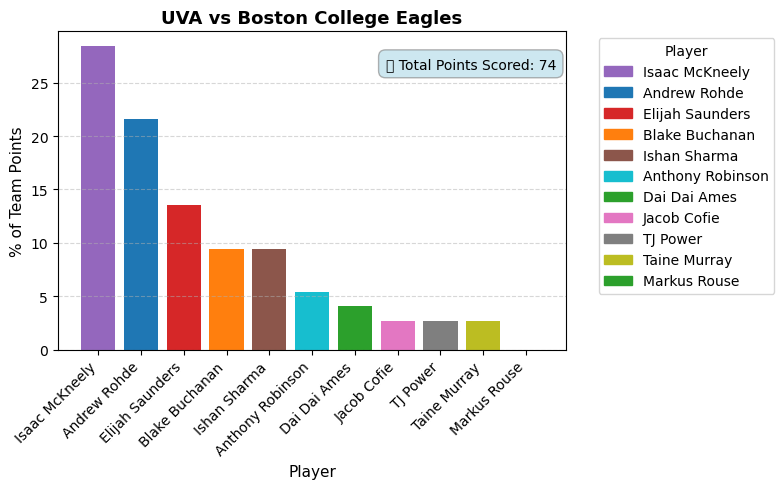

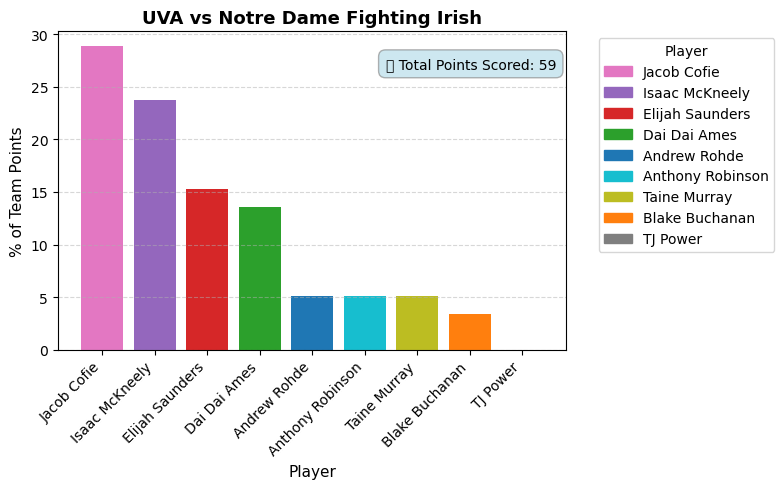

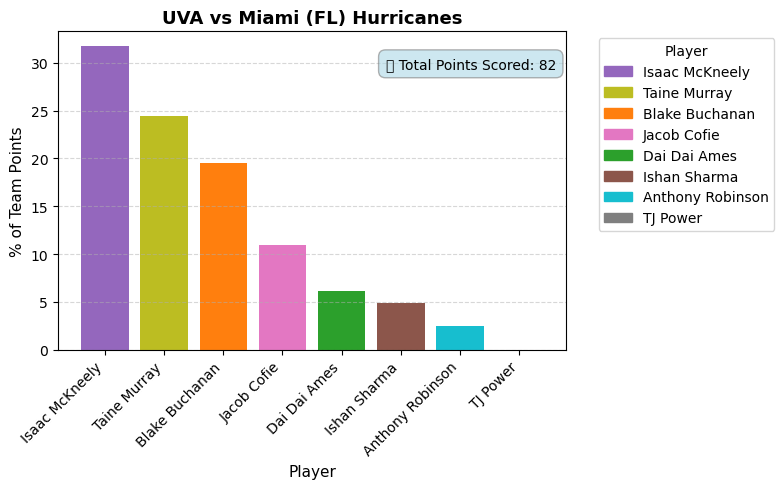

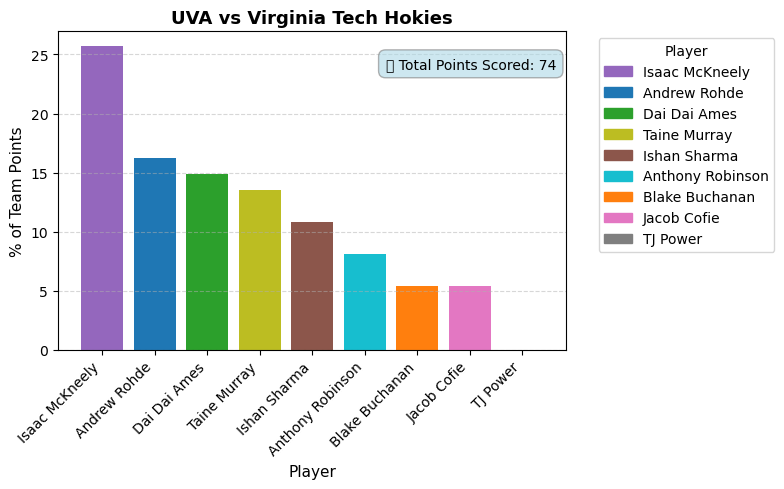

In [ ]:
# Step 1: Load data
data = pd.read_csv("uva_stats_DS2003.csv")
data["GAMEDATE"] = pd.to_datetime(data["GAMEDATE"])

# Step 2: Calculate total team points per game
team_points = data.groupby("GAMEDATE")["POINTS"].sum().reset_index()
team_points = team_points.rename(columns={"POINTS": "TEAM_POINTS"})

# Step 3: Merge totals into player-level data
data = data.merge(team_points, on="GAMEDATE")

# Step 4: Calculate each player's percentage of team points for that game
data["PCT_TEAM_POINTS"] = (data["POINTS"] / data["TEAM_POINTS"]) * 100

# Step 5: Assign a unique color to each player
players = data["PLAYER"].unique()
colors = plt.cm.tab10.colors  # 10 distinct colors
player_colors = {player: colors[i % len(colors)] for i, player in enumerate(players)}

# Step 6: Create one chart per game
for date in sorted(data["GAMEDATE"].unique()):
    # Filter one game
    game_data = data[data["GAMEDATE"] == date].sort_values("PCT_TEAM_POINTS", ascending=False)
    
    # Get opponent name and team total points
    opponent_name = game_data["OPPONENT"].iloc[0]
    uva_total_points = int(game_data["TEAM_POINTS"].iloc[0])

    # Get colors for each player
    bar_colors = [player_colors[player] for player in game_data["PLAYER"]]

    # Step 7: Create the bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(game_data["PLAYER"], game_data["PCT_TEAM_POINTS"], color=bar_colors)

    # Step 8: Add title and labels
    plt.title(f"UVA vs {opponent_name}", fontsize=13, fontweight="bold")
    plt.xlabel("Player", fontsize=11)
    plt.ylabel("% of Team Points", fontsize=11)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    # Step 9: Add total points box
    plt.text(
        0.98, 0.92,
        f"🏀 Total Points Scored: {uva_total_points}",
        fontsize=10,
        transform=plt.gca().transAxes,
        ha="right", va="top",
        bbox=dict(facecolor="lightblue", alpha=0.6, edgecolor="gray", boxstyle="round,pad=0.5")
    )

    # Step 10: Add a color legend (key) once per chart
    handles = [plt.Rectangle((0, 0), 1, 1, color=player_colors[p]) for p in game_data["PLAYER"]]
    plt.legend(handles, game_data["PLAYER"], bbox_to_anchor=(1.05, 1), loc="upper left", title="Player")

    plt.tight_layout()
    plt.show()


### Extra credit
##### *up to 3 points*


In the workbook "Charts that show relationships," figure out how to fix the code for annotating the scatter plots.

Explain what is wrong with the existing code and include the output of the corrected code (i.e., the annotated chart).

You only need to do this for one of the charts with annotation.